Cleaned Column Names:
Index(['No', 'X1_transaction_date', 'X2_house_age',
       'X3_distance_to_the_nearest_MRT_station',
       'X4_number_of_convenience_stores', 'X5_latitude', 'X6_longitude',
       'Y_house_price_of_unit_area'],
      dtype='object')

Renamed Columns:
Index(['Index', 'Transaction_Date', 'House_Age', 'Distance_to_MRT',
       'Num_Convenience_Stores', 'Latitude', 'Longitude',
       'Price_Per_Unit_Area'],
      dtype='object')

Missing Values Before Handling:
Index                     0
Transaction_Date          0
House_Age                 0
Distance_to_MRT           0
Num_Convenience_Stores    0
Latitude                  0
Longitude                 0
Price_Per_Unit_Area       0
dtype: int64

Missing Values After Handling:
Index                     0
Transaction_Date          0
House_Age                 0
Distance_to_MRT           0
Num_Convenience_Stores    0
Latitude                  0
Longitude                 0
Price_Per_Unit_Area       0
dtype: int64

Filtere

C:\Users\khata\AppData\Local\Temp\ipykernel_17672\1529668967.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Year'] = pd.to_datetime(filtered_data['Transaction_Date'], errors='coerce').dt.year
C:\Users\khata\AppData\Local\Temp\ipykernel_17672\1529668967.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data.dropna(subset=['Year'], inplace=True)


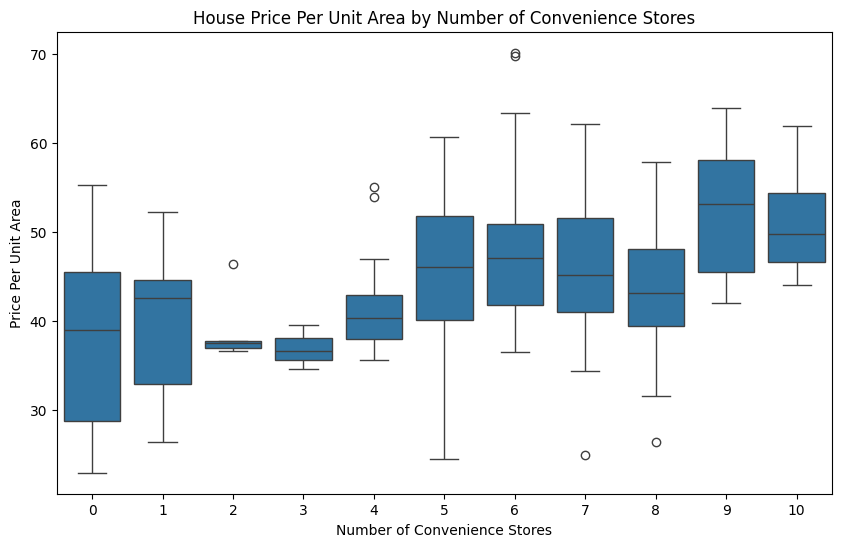

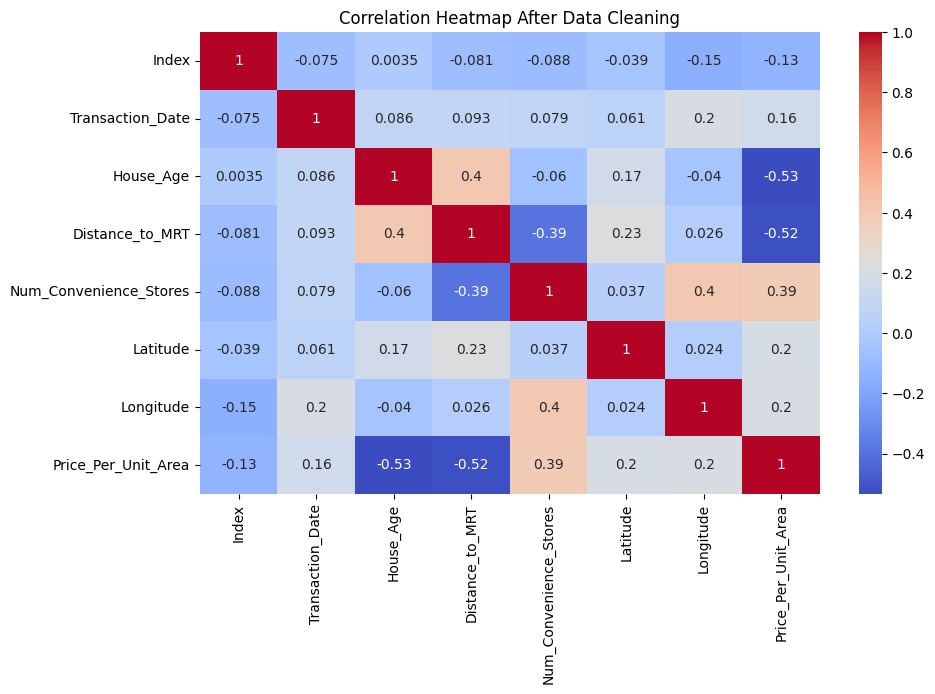


Cleaned dataset saved to: Cleaned_RealEstate_Prices.csv


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Import the dataset and clean column names
file_path = 'Real estate.csv'
data = pd.read_csv(file_path)

# Clean column names by removing spaces and special characters
data.columns = data.columns.str.strip().str.replace(' ', '_').str.replace('[^A-Za-z0-9_]', '')

print("Cleaned Column Names:")
print(data.columns)

# Rename columns for clarity
data.rename(columns={
    'No': 'Index',
    'X1_transaction_date': 'Transaction_Date',
    'X2_house_age': 'House_Age',
    'X3_distance_to_the_nearest_MRT_station': 'Distance_to_MRT',
    'X4_number_of_convenience_stores': 'Num_Convenience_Stores',
    'X5_latitude': 'Latitude',
    'X6_longitude': 'Longitude',
    'Y_house_price_of_unit_area': 'Price_Per_Unit_Area'
}, inplace=True)

print("\nRenamed Columns:")
print(data.columns)

# Step 2: Handle missing values
print("\nMissing Values Before Handling:")
print(data.isnull().sum())

# Impute missing values with median for numerical columns
for col in data.select_dtypes(include=[np.number]).columns:
    data[col].fillna(data[col].median(), inplace=True)

print("\nMissing Values After Handling:")
print(data.isnull().sum())

# Step 3: Data merging (Assuming an additional dataset is provided)
# For now, we proceed without merging as no additional dataset is specified.

# Step 4: Filter and subset the data based on specific criteria
# Filtering the dataset for properties with a house age less than 30 years and within 1 km of an MRT station
filtered_data = data[(data['House_Age'] < 30) & (data['Distance_to_MRT'] < 1000)]
print("\nFiltered Data Summary:")
print(filtered_data.describe())

# Step 5: Handle categorical variables (Assuming Transaction_Date is categorical)
# Extract year from Transaction_Date and encode it
filtered_data['Year'] = pd.to_datetime(filtered_data['Transaction_Date'], errors='coerce').dt.year
filtered_data.dropna(subset=['Year'], inplace=True)

# One-hot encode the year column
filtered_data = pd.get_dummies(filtered_data, columns=['Year'], drop_first=True)

# Step 6: Aggregate data to calculate summary statistics
# Calculate average sale price per unit area by number of convenience stores
average_price_by_store = filtered_data.groupby('Num_Convenience_Stores')['Price_Per_Unit_Area'].mean()
print("\nAverage Sale Price by Number of Convenience Stores:")
print(average_price_by_store)

# Step 7: Identify and handle outliers
# Using the IQR method to detect and remove outliers for 'Price_Per_Unit_Area'
q1 = filtered_data['Price_Per_Unit_Area'].quantile(0.25)
q3 = filtered_data['Price_Per_Unit_Area'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Remove outliers
filtered_data = filtered_data[(filtered_data['Price_Per_Unit_Area'] >= lower_bound) &
                              (filtered_data['Price_Per_Unit_Area'] <= upper_bound)]

print("\nData After Removing Outliers:")
print(filtered_data.describe())

# Step 8: Visualize the cleaned data
plt.figure(figsize=(10, 6))
sns.boxplot(data=filtered_data, x='Num_Convenience_Stores', y='Price_Per_Unit_Area')
plt.title("House Price Per Unit Area by Number of Convenience Stores")
plt.xlabel("Number of Convenience Stores")
plt.ylabel("Price Per Unit Area")
plt.show()

# Correlation Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(filtered_data.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap After Data Cleaning")
plt.show()
# Replace this path with a valid directory on your local system
output_path = 'Cleaned_RealEstate_Prices.csv'
filtered_data.to_csv(output_path, index=False)
print(f"\nCleaned dataset saved to: {output_path}")



# Task - 1: Import the "RealEstate_Prices.csv" dataset. Clean column names by removing spaces, special characters, or renaming them for clarity. 

In [3]:
# Import the dataset
df = pd.read_csv('Real estate.csv')

In [4]:
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [5]:
df.shape

(414, 8)

In [6]:
# Clean column names
df.columns = df.columns.str.replace(' ', '_').str.replace('[^a-zA-Z0-9_]', '', regex=True)

# Task - 2 : Handle missing values in the dataset, deciding on an appropriate strategy 

In [7]:
# Check for missing values
df.isnull().sum()

No                                        0
X1_transaction_date                       0
X2_house_age                              0
X3_distance_to_the_nearest_MRT_station    0
X4_number_of_convenience_stores           0
X5_latitude                               0
X6_longitude                              0
Y_house_price_of_unit_area                0
dtype: int64

In [9]:
df.columns

Index(['No', 'X1_transaction_date', 'X2_house_age',
       'X3_distance_to_the_nearest_MRT_station',
       'X4_number_of_convenience_stores', 'X5_latitude', 'X6_longitude',
       'Y_house_price_of_unit_area'],
      dtype='object')

In [8]:
df['area_type'].unique()

KeyError: 'area_type'

In [ ]:
df['area_type'].value_counts()

area_type
Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: count, dtype: int64

In [ ]:
df = df.drop(['area_type','society','balcony','availability'],axis='columns')

In [ ]:
df.shape

(13320, 5)

In [ ]:
df.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [ ]:
df = df.dropna()

In [ ]:
df.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

# Task -4 : Filter and subset the data based on specific criteria, such as a particular time period, property type, or location. 

In [ ]:
df['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [ ]:
df['bhk'] = df['size'].apply(lambda x: int(x.split(' ')[0]))

In [ ]:
df.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [ ]:
df.bhk.unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [ ]:
df[df.bhk>20]

,location,size,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


In [ ]:
df.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

# Task -5 : Handle categorical variables by encoding them appropriately (e.g., one-hot encoding or label encoding) for further analysis. 

In [ ]:
def is_float(x):
    try:
        float(x) 
        return True
    except(ValueError, TypeError):
        return False 

In [ ]:
df[~df['total_sqft'].apply(is_float)].head(10)

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


In [ ]:
def convert_sqft_to_num(x): 
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x) 
    except:
        return None

In [ ]:
convert_sqft_to_num('2100 - 2850')

2475.0

In [ ]:
convert_sqft_to_num('34.46Sq. Meter')

In [ ]:
df = df.copy()
df.total_sqft = df.total_sqft.apply(convert_sqft_to_num) 
df

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2
...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453.0,4.0,231.00,5
13316,Richards Town,4 BHK,3600.0,5.0,400.00,4
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2
13318,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4


In [ ]:
df = df[df.total_sqft.notnull()]
df

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2
...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453.0,4.0,231.00,5
13316,Richards Town,4 BHK,3600.0,5.0,400.00,4
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2
13318,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4


In [ ]:
# For below row, it shows total_sqft as 2475 which is an average of the range 2100-2850
df.loc[30]

location      Yelahanka
size              4 BHK
total_sqft       2475.0
bath                4.0
price             186.0
bhk                   4
Name: 30, dtype: object

In [ ]:
(2100+2850)/2

2475.0

In [ ]:
# feature Engineering 
# add new feature called price per square feet

df= df.copy()
df['price_per_sqft'] = df['price']*100000/df['total_sqft']
df.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [ ]:
df_stats = df['price_per_sqft'].describe()
df_stats

count    1.320000e+04
mean     7.920759e+03
std      1.067272e+05
min      2.678298e+02
25%      4.267701e+03
50%      5.438331e+03
75%      7.317073e+03
max      1.200000e+07
Name: price_per_sqft, dtype: float64

In [ ]:
df.to_csv("bhp.csv",index=False)

In [ ]:
#Examine locations which is a categorical variable. We need to apply dimensionality reduction technique here to reduce number of locations

len(df.location.unique())

1298

In [ ]:
df.location = df.location.apply(lambda x: x.strip())
location_stats = df['location'].value_counts(ascending=False)
location_stats

location
Whitefield                   533
Sarjapur  Road               392
Electronic City              304
Kanakpura Road               264
Thanisandra                  235
                            ... 
Rajanna Layout                 1
Subramanyanagar                1
Lakshmipura Vidyaanyapura      1
Malur Hosur Road               1
Abshot Layout                  1
Name: count, Length: 1287, dtype: int64

In [ ]:
len(location_stats[location_stats>10])

240

In [ ]:
len(location_stats)

1287

In [ ]:
len(location_stats[location_stats<=10])

1047

In [ ]:
# Dimensionality Reduction
# Any location having less than 10 data points should be tagged as "other" location.
# This way number of categories can be reduced by huge amount. Later on when we do one hot encoding, it will help us with having fewer dummy columns

location_stats_less_than_10 = location_stats[location_stats<=10]
location_stats_less_than_10

location
BTM 1st Stage                10
Gunjur Palya                 10
Nagappa Reddy Layout         10
Sector 1 HSR Layout          10
Thyagaraja Nagar             10
                             ..
Rajanna Layout                1
Subramanyanagar               1
Lakshmipura Vidyaanyapura     1
Malur Hosur Road              1
Abshot Layout                 1
Name: count, Length: 1047, dtype: int64

In [ ]:
len(df.location.unique())

1287

In [ ]:
df.location = df.location.apply(lambda x: 'other' if x in location_stats_less_than_10 else x)
len(df.location.unique())

241

In [ ]:
df.head(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
5,Whitefield,2 BHK,1170.0,2.0,38.00,2,3247.863248
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4,7467.057101
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4,18181.818182
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3,4828.244275
9,other,6 Bedroom,1020.0,6.0,370.00,6,36274.509804


# Task - 6 :  Aggregate the data to calculate summary statistics or derived metrics such as average sale prices by neighborhood or property type. 

In [ ]:
# Calculate average sale price by property type (number of bedrooms)
avg_price_by_bhk = df.groupby('bhk')['price'].mean().sort_values(ascending=False)
print("\nAverage Price by BHK:\n", avg_price_by_bhk)



Average Price by BHK:
 bhk
43    660.000000
16    550.000000
10    530.000000
19    490.000000
12    300.000000
5     280.200573
13    275.000000
4     271.453090
7     244.370000
9     240.461538
27    230.000000
6     224.604545
11    207.500000
8     206.613636
18    200.000000
14    125.000000
3     110.954665
2      59.536929
1      44.179594
Name: price, dtype: float64


# Task -7 : Identify and handle outliers or extreme values in the data that may affect the analysis or modeling process. 

In [ ]:
# normally square ft per bedroom is 300 (i.e. 2 bhk apartment is minimum 600 sqft)
df[df.total_sqft/df.bhk<300].head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,other,3 Bedroom,500.0,3.0,100.0,3,20000.000000


In [ ]:
# Check above data points. We have 6 bhk apartment with 1020 sqft. Another one is 8 bhk and total sqft is 600. These are clear data errors that can be removed safely

df.shape

(13200, 7)

In [ ]:
df = df[~(df.total_sqft/df.bhk<300)]
df.shape

(12456, 7)

In [ ]:
df.columns

Index(['location', 'size', 'total_sqft', 'bath', 'price', 'bhk',
       'price_per_sqft'],
      dtype='object')

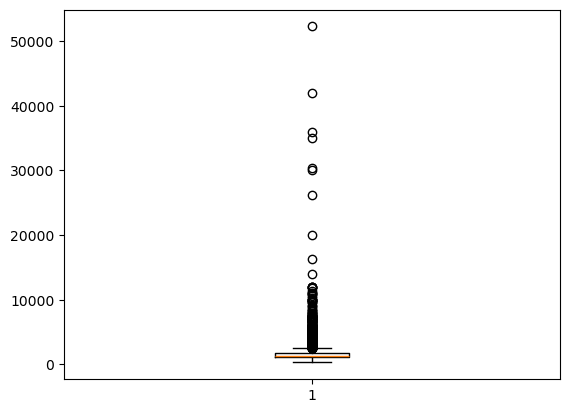

In [ ]:
plt.boxplot(df['total_sqft'])
plt.show()

In [ ]:
# Calculate the 25th and 75th percentiles for 'total_sqft'
Q1 = np.percentile(df['total_sqft'], 25)  # 25th percentile
Q3 = np.percentile(df['total_sqft'], 75)  # 75th percentile

# Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

# Define lower and upper limits for outlier detection
ll = Q1 - (1.5 * IQR)  # Lower limit
ul = Q3 + (1.5 * IQR)  # Upper limit

# Identify indices of outliers
upper_outliers = df[df['total_sqft'] > ul].index.tolist()
lower_outliers = df[df['total_sqft'] < ll].index.tolist()

# Combine all outlier indices into a single list
bad_indices = list(set(upper_outliers + lower_outliers))

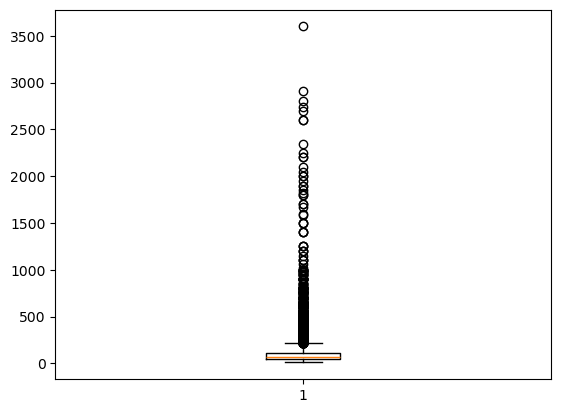

In [ ]:
plt.boxplot(df['price'])
plt.show()

In [ ]:
# Calculate the 25th and 75th percentiles for 'total_sqft'
Q1 = np.percentile(df['price'], 25)  # 25th percentile
Q3 = np.percentile(df['price'], 75)  # 75th percentile

# Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

# Define lower and upper limits for outlier detection
ll = Q1 - (1.5 * IQR)  # Lower limit
ul = Q3 + (1.5 * IQR)  # Upper limit

# Identify indices of outliers
upper_outliers = df[df['price'] > ul].index.tolist()
lower_outliers = df[df['price'] < ll].index.tolist()

# Combine all outlier indices into a single list
bad_indices = list(set(upper_outliers + lower_outliers))

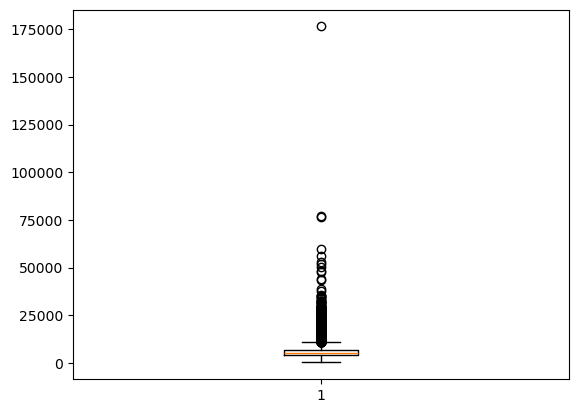

In [ ]:
plt.boxplot(df['price_per_sqft'])
plt.show()

In [ ]:
# Calculate the 25th and 75th percentiles for 'total_sqft'
Q1 = np.percentile(df['price_per_sqft'], 25)  # 25th percentile
Q3 = np.percentile(df['price_per_sqft'], 75)  # 75th percentile

# Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

# Define lower and upper limits for outlier detection
ll = Q1 - (1.5 * IQR)  # Lower limit
ul = Q3 + (1.5 * IQR)  # Upper limit

# Identify indices of outliers
upper_outliers = df[df['price_per_sqft'] > ul].index.tolist()
lower_outliers = df[df['price_per_sqft'] < ll].index.tolist()

# Combine all outlier indices into a single list
bad_indices = list(set(upper_outliers + lower_outliers))